In [1]:
dataset = 'data/F1Hz-Fs1kHz'

[<TdmsObject with path /'Untitled'/'Sine'>]
       wf_start_time: 1904-01-01 00:00:00+00:00
     wf_start_offset: 0.0
        wf_increment: 0.001
          wf_samples: 1000
      NI_ChannelName: Sine
NI_ExpIsRelativeTime: 1
        wf_time_pref: relative
NI_ExpStartTimeStamp: 2018-02-15 22:12:32.643799+00:00
     NI_ExpTimeStamp: 2018-02-15 22:12:32.643799+00:00
    NI_ExpXDimension: t
            wf_xname: Time
     wf_xunit_string: s


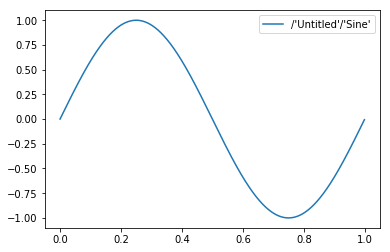

In [2]:
%matplotlib inline

from nptdms import TdmsFile

tdms = TdmsFile(dataset + '.tdms')

for group in tdms.groups():
    print(tdms.group_channels(group))
     
ch = tdms.object('Untitled', 'Sine')
for p in ch.properties:
    print('%20s: %s' % (p, ch.properties[p]))

tdms_df = ch.as_dataframe()
tdms_df.head()
tdms_df.plot()

   Decimal_Separator: .
      Writer_Version: 2
      Reader_Version: 2
           Separator: Tab
      Multi_Headings: Yes
           X_Columns: No
           Time_Pref: Relative
            Operator: ariza
                Date: 2018/02/15
                Time: 14:12:32.6437993049621582031
            Segments: 1

Channel 0
            Channels: 1
             Samples: [1000, nan]
                Date: ['2018/02/15', '']
                Time: ['14:12:32.6437993049621582031', '']
         X_Dimension: ['Time', '']
                  X0: [0.0, nan]
             Delta_X: [0.001, nan]
       Channel names: ['Sine', 'Comment']


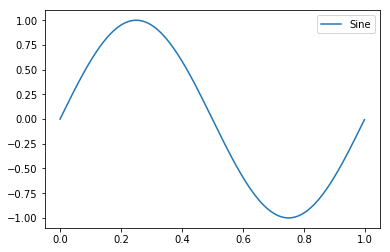

In [3]:
import lvm_read
import pandas as pd

lvm = lvm_read.read(dataset + '.lvm')

for p in lvm:
    if not p == 0:
        print('%20s: %s' % (p, lvm[p]))

print('\nChannel 0')
for p in lvm[0]:
    if not p == 'data':
        print('%20s: %s' % (p, lvm[0][p]))
        
lvm_df = pd.DataFrame(lvm[0]['data'], columns=[lvm[0]['Channel names'][0]])
lvm_df.index = lvm[0]['Delta_X'][0] * lvm_df.index 
lvm_df.head()
lvm_df.plot()

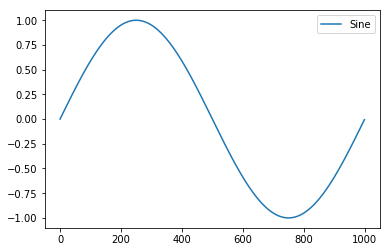

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

index = np.arange(0, 1000 * 0.001, 0.001)
func_df = pd.DataFrame(data=np.sin(2 * np.pi * index), columns=['Sine'])

func_df.head()
func_df.plot()

tdms_mse: 1.8176076903777293e-31
 lvm_mse: 8.27654126993087e-14


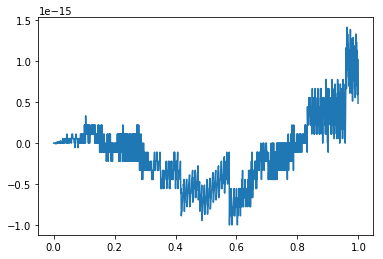

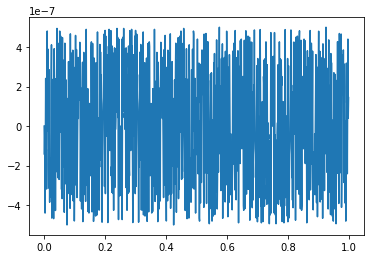

In [5]:
tdms_diff = tdms_df.values - func_df.values
tdms_mse = (tdms_diff ** 2).mean()

plt.figure()
plt.plot(index, tdms_diff)
print('tdms_mse:', tdms_mse)

lvm_diff = lvm_df.values - func_df.values
lvm_mse = (lvm_diff ** 2).mean()

plt.figure()
plt.plot(index, lvm_diff)
print(' lvm_mse:', lvm_mse)